In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install spacytextblob emot demoji ekphrasis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import re
import demoji

demoji.download_codes()

     |████████████████████████████████| 81kB 4.6MB/s 
     |████████████████████████████████| 12.8MB 10.2MB/s 
     |████████████████████████████████| 184kB 61.4MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 1.1MB 61.5MB/s 
     |████████████████████████████████| 460kB 62.2MB/s 
     |████████████████████████████████| 9.1MB 41.9MB/s 
     |████████████████████████████████| 122kB 58.6MB/s 
  Created wheel for ekphrasis: filename=ekphrasis-0.5.1-cp37-none-any.whl size=82844 sha256=6c72960105c877d7227d2453858b7b824535991f98c7d6066c3a91bfc9ca714d
  Stored in directory: /root/.cache/pip/wheels/2f/c5/9b/c9b60f535a2cf9fdbc92d84c4801a010c35a9cd348011ed2a1
  Created wheel for ftfy: filename=ftfy-5.9-cp37-none-any.whl size=46451 sha256=034c9c3b1606c7b38e200a3a90c53ae22c45888592eb30f3fd4e74d64110fba9
  Stored in directory: /root/.cache/pip/wheels/5e/2e/f0/b07196e8c929114998f0316894a61c752b63bfa3fdd50d2fc3
  Created wheel for smart-open: filenam

In [ ]:
nlp = spacy.load('en_core_web_sm')
spacy_text_blob = SpacyTextBlob()
nlp.add_pipe(spacy_text_blob)

/usr/local/lib/python3.7/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
df = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/sentiment140.csv', encoding = "ISO-8859-1", names=['target', 'ids', 'date', 'flag', 'user', 'text'])

def map(x):
  if x == 0:
    return 1
  return 2

df['subjectivity'] = 1
df['polarity'] = df.target.apply(map)

df = df[['text', 'subjectivity', 'polarity']]

In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/findata.csv', encoding = "ISO-8859-1", names=['sentiment', 'text'])

def map(x):
  if x == 'neutral':
    return 0
  if x == 'negative':
    return 1
  return 2

df2['subjectivity'] = (df2['sentiment'] != 'neutral').astype(int)
df2['polarity'] = df2.sentiment.apply(map)

df2 = df2[['text', 'subjectivity', 'polarity']]

In [ ]:
df3 = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/airline-tweets.csv', encoding = "ISO-8859-1")

def map(x):
  if x == 'neutral':
    return 0
  if x == 'negative':
    return 1
  return 2

df3['subjectivity'] = (df3['airline_sentiment'] != 'neutral').astype(int)
df3['polarity'] = df3.airline_sentiment.apply(map)

df3 = df3[['text', 'subjectivity', 'polarity']]

In [ ]:
df4 = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/processed-neu.csv', encoding = "ISO-8859-1")
df4 = pd.DataFrame.from_dict({'text': df4.columns.values})
df4['subjectivity'] = 0
df4['polarity'] = 0

df5 = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/processed-neg.csv', encoding = "ISO-8859-1")
df5 = pd.DataFrame.from_dict({'text': df5.columns.values})
df5['subjectivity'] = 1
df5['polarity'] = 1

df6 = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/processed-pos.csv', encoding = "ISO-8859-1")
df6 = pd.DataFrame.from_dict({'text': df6.columns.values})
df6['subjectivity'] = 1
df6['polarity'] = 2

In [ ]:
df = pd.concat([df2,df3,df4,df5,df6])

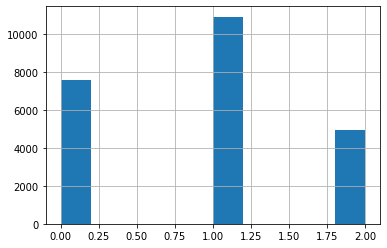

In [ ]:
df.polarity.hist()

# Studying of text

## stopwords
check the stopwords in the corpus to figure out if any of it is useful

In [ ]:
lexeme = nlp.vocab
for stopwords in lexeme:
  if stopwords.is_stop is True:
    print(stopwords.text)   

In [ ]:
distribution_dictionary = {}
text_arr = list(df.text)
length = 0

nlp = English()
token_list = []

for text in text_arr:
  my_doc = nlp(text)
  for token in my_doc:
      token_list.append(token.text)

for token in token_list:
  lexeme = nlp.vocab[token]
  if lexeme.is_stop is True:
    distribution_dictionary[lexeme.text] = distribution_dictionary.get(lexeme.text, 0) + 1


In [ ]:
import operator

sorted_dict = dict( sorted(distribution_dictionary.items(), key=operator.itemgetter(1),reverse=True))
take_first_20 = {k: sorted_dict[k] for k in list(sorted_dict)[:20]}
print(take_first_20)


{'I': 665489, 'to': 570001, 'the': 501252, 'a': 376018, 'i': 339700, 'and': 288434, 'my': 286185, 'you': 273178, 'it': 263268, 'is': 236078, 'for': 217514, 'in': 213937, 'of': 186448, "'s": 181755, "n't": 173088, 'on': 165587, 'that': 157422, 'me': 156105, 'have': 145786, 'so': 132316}


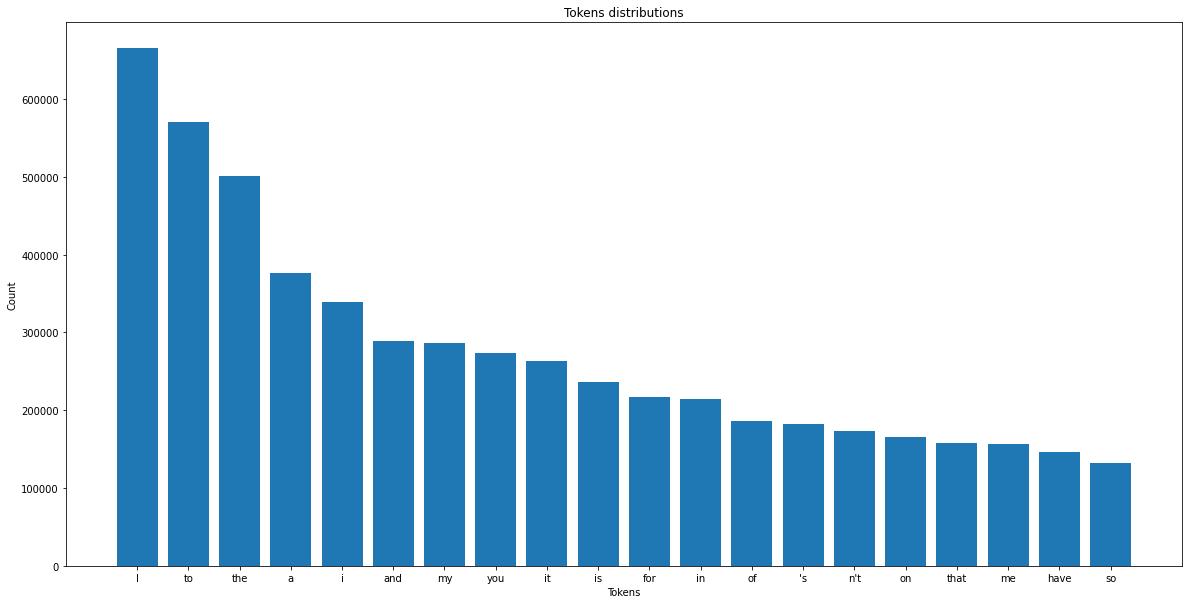

In [ ]:
plt.figure(figsize=(20,10))
plt.ylabel('Count')
plt.xlabel('Tokens')
plt.title('Tokens distributions')
plt.bar(*zip(*take_first_20.items()))
plt.show()

The top 20 stopwords are listed and 'to' seems to be the most useful, but running a quick search on the corpus shows that it doesn't show any informative information. Hence, all stopwords could be removed

## unidentified tokens
check if any unidentified tokens shows any useful information

# Text pre-processing

In [ ]:
nlp = English()

# Converting emojis to words
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
    return text

# Converting emoticons to words    
def remove_emoticons(text):
  if EMOTICONS in text.split():
    text = text.replace(emot, ' ')
  return text

# def demojify(text):
#     regrex_pattern = re.compile(pattern = "["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags = re.UNICODE)
#     return regrex_pattern.sub(r'',text)

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_stopwords(text):
  my_doc = nlp(text)
  filtered_sentence = []
  for token in my_doc:
    lexeme = nlp.vocab[token.text]
    if lexeme.is_stop is False:
        filtered_sentence.append(lexeme.text) 

  return " ".join(filtered_sentence)

def replace_lingos_and_punctuations(text):
  text = re.sub('&gt;', ' greater than ', text)  
  text = re.sub('&lt;', ' lesser than ', text)
  text = re.sub('&le;', ' lesser than or equal to ', text)
  text = re.sub('&ge;', ' greater than or equal to ', text)
  text = re.sub('[^\w\s$%]','', text)
  text = re.sub('&[\w]+;', ' ', text)
  text = re.sub('\n', ' ', text)
  return text

def preprocessing(text):
  text = remove_urls(text)
  text = replace_lingos_and_punctuations(text)
  # text = remove_emoticons(text)
  text = demoji.replace_with_desc(text, sep='')
  text = text.lower()
  text = remove_stopwords(text)
  text = re.sub(' +', ' ', text);
  return text.strip()


tqdm.pandas()
df['processed_text'] = df['text'].progress_apply(preprocessing)

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
df.to_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/combined_text_data.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size=0.2, shuffle=True, random_state=42, stratify=df[['subjectivity', 'polarity']])

train.to_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/sean_train.csv', index=False)
val.to_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/sean_val.csv', index=False)

# Training

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers sentencepiece ekphrasis

import os
import pickle
import math
import numpy as np
from tqdm.notebook import tqdm
from tokenizers import BertWordPieceTokenizer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

from transformers import BertTokenizer, DistilBertTokenizer, AlbertTokenizer, AlbertTokenizerFast, BertweetTokenizer, XLMRobertaTokenizer, AutoTokenizer
from transformers import TFAutoModel, TFAlbertModel, TFDistilBertModel, TFBertModel, TFXLMRobertaModel, AlbertConfig, TFAutoModelForSequenceClassification

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy

from tqdm.notebook import tqdm
tqdm.pandas()

     |████████████████████████████████| 2.0MB 7.0MB/s 
     |████████████████████████████████| 1.2MB 24.7MB/s 
     |████████████████████████████████| 81kB 6.8MB/s 
     |████████████████████████████████| 3.3MB 40.9MB/s 
     |████████████████████████████████| 870kB 53.3MB/s 
     |████████████████████████████████| 184kB 43.5MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
  Created wheel for ekphrasis: filename=ekphrasis-0.5.1-cp37-none-any.whl size=82844 sha256=6eb534d1375224db88cbc4556c27487e88e75031c4115409569841072378125d
  Stored in directory: /root/.cache/pip/wheels/2f/c5/9b/c9b60f535a2cf9fdbc92d84c4801a010c35a9cd348011ed2a1
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=15bff8cd3402ae40d8b5a55f40b50bcb769ceeb5326ca8df0164daec8dbf654d
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
  Created wheel for ftfy: filename=ftfy-5.9-cp37-none-any.whl size=46451 sha256=8

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
train = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/train2.csv', lineterminator='\n')
val = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/val2.csv', lineterminator='\n')
test = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/manually_labelled_test.csv', lineterminator='\n')

In [ ]:
text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
        'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
        'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=True,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt
Reading twitter - 1grams ...


/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [ ]:
len(train)

17519

In [ ]:
train.text = train.text.progress_apply(lambda x: " ".join(text_processor.pre_process_doc(x)))
val.text = val.text.progress_apply(lambda x: " ".join(text_processor.pre_process_doc(x)))
test.text = test.text.progress_apply(lambda x: " ".join(text_processor.pre_process_doc(x)))

In [ ]:
max(train.text.str.len())

451

In [ ]:
str_len = train.text.str.len()
str_len.quantile(0.99)

274.0

In [ ]:
MAX_LEN = 256

In [ ]:
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.37.86.26:8470


INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Initializing the TPU system: grpc://10.37.86.26:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.37.86.26:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [ ]:
def fast_encode(sentences, tokenizer, chunk_size=256, maxlen=512):
    input_ids, input_masks = [],[]
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=maxlen, 
                                       padding='max_length', 
                                       truncation=True,
                                       return_attention_mask=False, 
                                       return_token_type_ids=False)
        input_ids.append(inputs['input_ids'])
        # input_masks.append(inputs['attention_mask'])
        # input_segments.append(inputs['token_type_ids'])

    return np.asarray(input_ids, dtype='int32')

In [ ]:
BERTWEET = 'vinai/bertweet-base'
ALBERT = 'albert-base-v2'
BERT_BASE = 'bert-base-uncased'
BERT_LARGE = 'bert-large-uncased'
DISTILBERT_BASE = 'distilbert-base-uncased'
XLM_ROBERTA_BASE = 'jplu/tf-xlm-roberta-base'
ROBERTA_TWITTER_BASE = 'cardiffnlp/twitter-roberta-base-sentiment'

bert_type = BERT_BASE

with strategy.scope():
  fast_tokenizer = AutoTokenizer.from_pretrained(bert_type, do_lower_case=True, use_fast=True)
  base_model = TFAutoModel.from_pretrained(bert_type)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
fast_encode(['is it working'], fast_tokenizer, maxlen=MAX_LEN)


In [ ]:
with strategy.scope():
  X_train = fast_encode(train.text.values.tolist(), fast_tokenizer, maxlen=MAX_LEN)
  X_val = fast_encode(val.text.values.tolist(), fast_tokenizer, maxlen=MAX_LEN)
  # X_test = fast_encode(test.text.values.tolist(), fast_tokenizer, maxlen=MAX_LEN)

  # sub_train = np.eye(2)[train.subjectivity.values]
  # sub_val = np.eye(2)[val.subjectivity.values]
  # sub_test = np.eye(2)[test.subjectivity.values]

  y_train = np.eye(3)[train.polarity.values]
  y_val = np.eye(3)[val.polarity.values]

  X_test = fast_encode(test.text.values.tolist(), fast_tokenizer, maxlen=MAX_LEN)
  y_test = np.eye(3)[test.polarity.values]

In [ ]:
# with strategy.scope():
#   X_train = fast_encode(train.text.values.tolist(), fast_tokenizer, maxlen=MAX_LEN)
#   X_val = fast_encode(val.text.values.tolist(), fast_tokenizer, maxlen=MAX_LEN)
#   X_test = fast_encode(test.text.values.tolist(), fast_tokenizer, maxlen=MAX_LEN)

#   sub_train = np.eye(2)[train.subjectivity.values]
#   sub_val = np.eye(2)[val.subjectivity.values]
#   sub_test = np.eye(2)[test.subjectivity.values]

#   pol_train = np.eye(3)[train.polarity.values]
#   pol_val = np.eye(3)[val.polarity.values]
#   pol_test = np.eye(3)[test.polarity.values]

#   y_train = {'subjectivity': sub_train, 'polarity': pol_train}
#   y_val = {'subjectivity': sub_val, 'polarity': pol_val}
#   y_test = {'subjectivity': sub_test, 'polarity': pol_test}

In [ ]:
def save_encodings(name):
  dump = {
      'X_train': X_train,
      'X_val': X_val,
      'y_train': y_train,
      'y_val': y_val
  }

  with open('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/encodings_{}.pickle'.format(name), 'wb') as handle:
    pickle.dump(dump, handle, protocol=pickle.HIGHEST_PROTOCOL)  

def load_encodings(name):
  with open('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/encodings_{}.pickle'.format(name), 'rb') as handle:
    dump = pickle.load(handle)

  return dump['X_train'], dump['X_val'], dump['y_train'], dump['y_val']

In [ ]:
# Save encodings
save_encodings(base_model)

In [ ]:
# Reload encoded inputs from file if runtime crashes, no need to re-encode
X_train, X_val, y_train, y_val = load_encodings(base_model)

In [ ]:
BATCH_SIZE = 24 * strategy.num_replicas_in_sync
AUTO = tf.data.experimental.AUTOTUNE

train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_train, y_train))
    .repeat()
    .shuffle(10 * BATCH_SIZE)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

val_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_val, y_val))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_test, y_test))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

#Bert-base

In [ ]:
def build_model(transformer, max_len=512, dropout_val=0.1, lr=1e-5):
    # for layer in transformer.layers[:-20]:
    #   layer.trainable = False

    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]

    norm = BatchNormalization()(cls_token)
    dropout1 = Dropout(dropout_val)(norm)
    dense = Dense(1024, activation='relu')(dropout1)
    dropout2 = Dropout(dropout_val)(dense)

    polarity = Dense(3, activation='softmax', name='polarity')(dropout2)
    
    model = Model(inputs=input_word_ids, outputs=polarity)

    model.compile(Adam(lr), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy('accuracy')])
    
    return model

with strategy.scope():
  # transformer_layer = (base_model)
  model = build_model(base_model, max_len=MAX_LEN, dropout_val=0.3, lr=1e-6)
model.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 256)]             0         
_________________________________________________________________
tf_bert_model (TFBertModel)  TFBaseModelOutputWithPool 109482240 
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 768)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 768)               3072      
_________________________________________________________________
dropout_37 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              787456    
_________________________________________________________________
dropout_38 (Dropout)         (None, 1024)              0     

In [ ]:
STEPS = len(X_train) // BATCH_SIZE

with strategy.scope():
  history = model.fit(
      train_dataset,
      steps_per_epoch=STEPS,
      validation_data=val_dataset,
      epochs=50,
      # class_weight = d_class_weights,
      callbacks=[
                 tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                 tf.keras.callbacks.ReduceLROnPlateau(patience=3, verbose=1),
                #  tf.keras.callbacks.CSVLogger("bert_base.csv", append=False),
                #  tf.keras.callbacks.LearningRateScheduler(exp_decay),
                 tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/CZ4034/bert-base-weights.h5', 
                                                    monitor='val_loss', 
                                                    verbose=0, 
                                                    save_best_only=True, 
                                                    save_weights_only=True)
                 ]
  )

Epoch 1/50


91/91 [==============================] - ETA: 0s - loss: 1.7861 - accuracy: 0.2862WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


91/91 [==============================] - 122s 491ms/step - loss: 1.7850 - accuracy: 0.2863 - val_loss: 1.0135 - val_accuracy: 0.5057
Epoch 2/50
91/91 [==============================] - 30s 331ms/step - loss: 1.4204 - accuracy: 0.3602 - val_loss: 1.0302 - val_accuracy: 0.5846
Epoch 3/50
91/91 [==============================] - 30s 326ms/step - loss: 1.1978 - accuracy: 0.4531 - val_loss: 1.0327 - val_accuracy: 0.5937
Epoch 4/50
91/91 [==============================] - 30s 326ms/step - loss: 1.1323 - accuracy: 0.5019 - val_loss: 1.0054 - val_accuracy: 0.6063
Epoch 5/50
91/91 [==============================] - 31s 337ms/step - loss: 1.0899 - accuracy: 0.5282 - val_loss: 0.9365 - val_accuracy: 0.6115
Epoch 6/50
91/91 [==============================] - 30s 328ms/step - loss: 1.0268 - accuracy: 0.5587 - val_loss: 0.9087 - val_accuracy: 0.6517
Epoch 7/50
91/91 [==============================] - 30s 332ms/step - loss: 0.9610 - accuracy: 0.5950 - val_loss: 0.7834 - val_accuracy: 0.6964
Epoch 8/5

In [ ]:
model.save_weights('/content/drive/My Drive/CZ4034/bert-base-weights.h5')

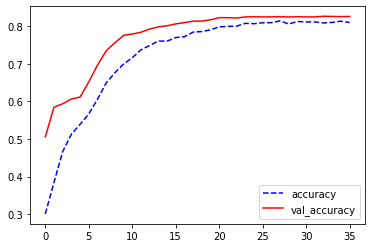

In [ ]:
plt.plot(history.history['accuracy'], 'b--')
plt.plot(history.history['val_accuracy'], 'r-')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

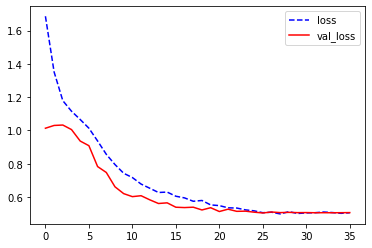

In [ ]:
plt.plot(history.history['loss'], 'b--')
plt.plot(history.history['val_loss'], 'r-')
plt.legend(['loss', 'val_loss'])
plt.show()

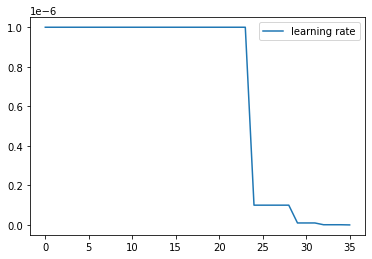

In [ ]:
plt.plot(history.history['lr'])
plt.legend(['learning rate'])
plt.show()

In [ ]:
with strategy.scope():
  model.load_weights('/content/drive/My Drive/CZ4034/bert-base-weights.h5')
  y_pred = model.predict(test_dataset, verbose=1)

9/9 [==============================] - 17s 2s/step


In [ ]:
def save_pred(y_pred, name):
  test['polarity_pred_prob'] = np.amax(y_pred, axis=1)
  test['polarity_pred'] = np.argmax(y_pred, axis=1)

  test.to_csv(name, index=False)

In [ ]:
save_pred(y_pred, '/content/drive/My Drive/CZ4034/predictions/bert-base.csv')

#Bert-base + Preprocessing

In [ ]:
def build_model(transformer, max_len=512, dropout_val=0.1, lr=1e-5):
    # for layer in transformer.layers[:-20]:
    #   layer.trainable = False

    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]

    norm = BatchNormalization()(cls_token)
    dropout1 = Dropout(dropout_val)(norm)
    dense = Dense(1024, activation='relu')(dropout1)
    dropout2 = Dropout(dropout_val)(dense)

    polarity = Dense(3, activation='softmax', name='polarity')(dropout2)
    
    model = Model(inputs=input_word_ids, outputs=polarity)

    model.compile(Adam(lr), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy('accuracy')])
    
    return model

with strategy.scope():
  # transformer_layer = (base_model)
  model = build_model(base_model, max_len=MAX_LEN, dropout_val=0.3, lr=1e-5)
model.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 256)]             0         
_________________________________________________________________
tf_bert_model (TFBertModel)  TFBaseModelOutputWithPool 109482240 
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 768)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 768)               3072      
_________________________________________________________________
dropout_37 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              787456    
_________________________________________________________________
dropout_38 (Dropout)         (None, 1024)              0     

In [ ]:
STEPS = len(X_train) // BATCH_SIZE

with strategy.scope():
  history = model.fit(
      train_dataset,
      steps_per_epoch=STEPS,
      validation_data=val_dataset,
      epochs=50,
      # class_weight = d_class_weights,
      callbacks=[
                 tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                 tf.keras.callbacks.ReduceLROnPlateau(patience=3, verbose=1),
                #  tf.keras.callbacks.CSVLogger("bert_base.csv", append=False),
                #  tf.keras.callbacks.LearningRateScheduler(exp_decay),
                 tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/CZ4034/bert-base-preprocessing-weights.h5', 
                                                    monitor='val_loss', 
                                                    verbose=0, 
                                                    save_best_only=True, 
                                                    save_weights_only=True)
                 ]
  )

Epoch 1/50


91/91 [==============================] - ETA: 0s - loss: 1.3830 - accuracy: 0.4130WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


91/91 [==============================] - 120s 486ms/step - loss: 1.3810 - accuracy: 0.4138 - val_loss: 0.8917 - val_accuracy: 0.6901
Epoch 2/50
91/91 [==============================] - 30s 329ms/step - loss: 0.8132 - accuracy: 0.6752 - val_loss: 0.5832 - val_accuracy: 0.7889
Epoch 3/50
91/91 [==============================] - 30s 326ms/step - loss: 0.5916 - accuracy: 0.7710 - val_loss: 0.4526 - val_accuracy: 0.8217
Epoch 4/50
91/91 [==============================] - 30s 330ms/step - loss: 0.5139 - accuracy: 0.8094 - val_loss: 0.4167 - val_accuracy: 0.8330
Epoch 5/50
91/91 [==============================] - 30s 327ms/step - loss: 0.4660 - accuracy: 0.8251 - val_loss: 0.4461 - val_accuracy: 0.8313
Epoch 6/50
91/91 [==============================] - 30s 325ms/step - loss: 0.4323 - accuracy: 0.8363 - val_loss: 0.4244 - val_accuracy: 0.8462
Epoch 7/50
91/91 [==============================] - 30s 325ms/step - loss: 0.3898 - accuracy: 0.8508 - val_loss: 0.4285 - val_accuracy: 0.8498

Epoch 00

In [ ]:
model.save_weights('/content/drive/My Drive/CZ4034/bert-base-preprocessing-weights.h5')

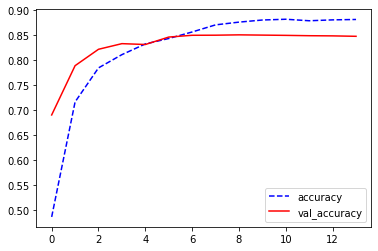

In [ ]:
plt.plot(history.history['accuracy'], 'b--')
plt.plot(history.history['val_accuracy'], 'r-')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

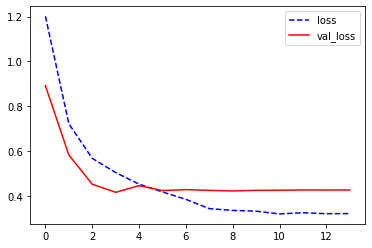

In [ ]:
plt.plot(history.history['loss'], 'b--')
plt.plot(history.history['val_loss'], 'r-')
plt.legend(['loss', 'val_loss'])
plt.show()

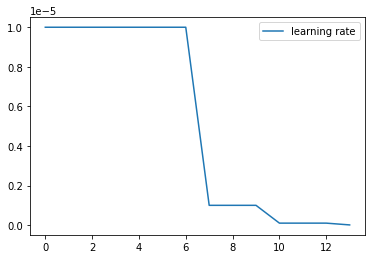

In [ ]:
plt.plot(history.history['lr'])
plt.legend(['learning rate'])
plt.show()

In [ ]:
with strategy.scope():
  model.load_weights('/content/drive/My Drive/CZ4034/bert-base-preprocessing-weights.h5')
  y_pred = model.predict(test_dataset, verbose=1)

9/9 [==============================] - 16s 1s/step


In [ ]:
def save_pred(y_pred, name):
  test['polarity_pred_prob'] = np.amax(y_pred, axis=1)
  test['polarity_pred'] = np.argmax(y_pred, axis=1)

  test.to_csv(name, index=False)

In [ ]:
save_pred(y_pred, '/content/drive/My Drive/CZ4034/predictions/bert-base-preprocessing.csv')

#Bert + multitask

In [ ]:
def build_model(transformer, max_len=512, dropout_val=0.1, lr=1e-5):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]

    norm = BatchNormalization()(cls_token)
    dropout1 = Dropout(dropout_val)(norm)
    dense = Dense(1024, activation='relu')(dropout1)
    dropout2 = Dropout(dropout_val)(dense)

    subjectivity = Dense(2, activation='softmax', name='subjectivity')(dropout2)
    polarity = Dense(3, activation='softmax', name='polarity')(dropout2)
    
    model = Model(inputs=input_word_ids, outputs=[subjectivity, polarity])

    model.compile(Adam(lr), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy('accuracy')])
    
    return model
    
with strategy.scope():
  # transformer_layer = (base_model)
  model = build_model(base_model, max_len=MAX_LEN, dropout_val=0.3, lr=1e-6)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 256)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   TFBaseModelOutputWit 109482240   input_word_ids[0][0]             
__________________________________________________________________________________________________
tf.__operators__.getitem_4 (Sli (None, 768)          0           tf_bert_model_1[4][0]            
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 768)          3072        tf.__operators__.getitem_4[0][0] 
____________________________________________________________________________________________

In [ ]:
STEPS = len(X_train) // BATCH_SIZE

with strategy.scope():
  history = model.fit(
      train_dataset,
      steps_per_epoch=STEPS,
      validation_data=val_dataset,
      epochs=50,
      # class_weight = d_class_weights,
      callbacks=[
                 tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                 tf.keras.callbacks.ReduceLROnPlateau(patience=3, verbose=1),
                #  tf.keras.callbacks.CSVLogger("bert_base.csv", append=False),
                #  tf.keras.callbacks.LearningRateScheduler(exp_decay),
                 tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/CZ4034/bert-multitask-weights.h5', 
                                                    monitor='val_loss', 
                                                    verbose=0, 
                                                    save_best_only=True, 
                                                    save_weights_only=True)
                 ]
  )

Epoch 1/50


91/91 [==============================] - ETA: 0s - loss: 1.9695 - subjectivity_loss: 0.7686 - polarity_loss: 1.2008 - subjectivity_accuracy: 0.5912 - polarity_accuracy: 0.4532WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


91/91 [==============================] - 126s 507ms/step - loss: 1.9643 - subjectivity_loss: 0.7667 - polarity_loss: 1.1977 - subjectivity_accuracy: 0.5923 - polarity_accuracy: 0.4548 - val_loss: 0.9537 - val_subjectivity_loss: 0.3859 - val_polarity_loss: 0.5678 - val_subjectivity_accuracy: 0.8717 - val_polarity_accuracy: 0.8373
Epoch 2/50
91/91 [==============================] - 31s 342ms/step - loss: 0.8390 - subjectivity_loss: 0.3462 - polarity_loss: 0.4928 - subjectivity_accuracy: 0.8527 - polarity_accuracy: 0.8177 - val_loss: 0.7315 - val_subjectivity_loss: 0.3028 - val_polarity_loss: 0.4287 - val_subjectivity_accuracy: 0.8777 - val_polarity_accuracy: 0.8440
Epoch 3/50
91/91 [==============================] - 31s 345ms/step - loss: 0.6722 - subjectivity_loss: 0.2806 - polarity_loss: 0.3916 - subjectivity_accuracy: 0.8931 - polarity_accuracy: 0.8713 - val_loss: 0.7269 - val_subjectivity_loss: 0.3018 - val_polarity_loss: 0.4251 - val_subjectivity_accuracy: 0.8765 - val_polarity_accu

In [ ]:
model.save_weights('/content/drive/My Drive/CZ4034/bert-multitask-weights.h5')

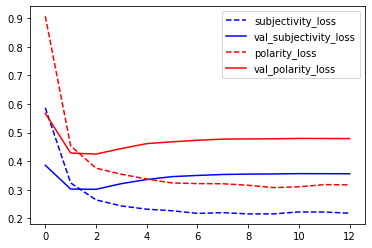

In [ ]:
plt.plot(history.history['subjectivity_loss'], 'b--')
plt.plot(history.history['val_subjectivity_loss'], 'b-')
plt.plot(history.history['polarity_loss'], 'r--')
plt.plot(history.history['val_polarity_loss'], 'r-')
plt.legend(['subjectivity_loss', 'val_subjectivity_loss', 'polarity_loss', 'val_polarity_loss'])
plt.show()

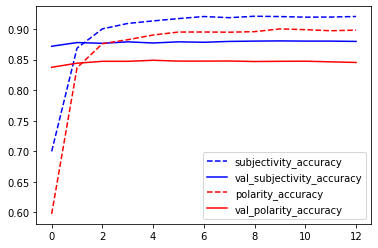

In [ ]:
plt.plot(history.history['subjectivity_accuracy'], 'b--')
plt.plot(history.history['val_subjectivity_accuracy'], 'b-')
plt.plot(history.history['polarity_accuracy'], 'r--')
plt.plot(history.history['val_polarity_accuracy'], 'r-')
plt.legend(['subjectivity_accuracy', 'val_subjectivity_accuracy', 'polarity_accuracy', 'val_polarity_accuracy'])
plt.show()

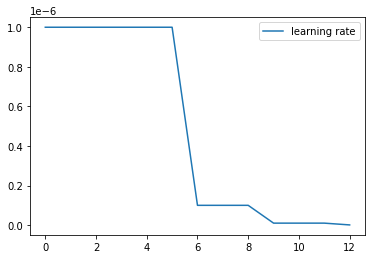

In [ ]:
plt.plot(history.history['lr'])
plt.legend(['learning rate'])
plt.show()

In [ ]:
with strategy.scope():
  model.load_weights('/content/drive/My Drive/CZ4034/bert-multitask-weights.h5')
  y_pred = model.predict(test_dataset, verbose=1)

9/9 [==============================] - 16s 1s/step


In [ ]:
def save_pred(y_pred, name):
  test['subjectivity_pred_prob'] = np.amax(y_pred[0], axis=1)
  test['subjectivity_pred'] = np.argmax(y_pred[0], axis=1)
  test['polarity_pred_prob'] = np.amax(y_pred[1], axis=1)
  test['polarity_pred'] = np.argmax(y_pred[1], axis=1)

  indices = test[(test.subjectivity_pred == 0) & (test.polarity_pred != 0)].index
  test.loc[indices, 'polarity_pred'] = 0

  test.to_csv(name, index=False)

In [ ]:
save_pred(y_pred, '/content/drive/My Drive/CZ4034/predictions/bert-multitask.csv')

#Bert + preproccessing + multitask

In [ ]:
def build_model(transformer, max_len=512, dropout_val=0.1, lr=1e-5):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]

    norm = BatchNormalization()(cls_token)
    dropout1 = Dropout(dropout_val)(norm)
    dense = Dense(1024, activation='relu')(dropout1)
    dropout2 = Dropout(dropout_val)(dense)

    subjectivity = Dense(2, activation='softmax', name='subjectivity')(dropout2)
    polarity = Dense(3, activation='softmax', name='polarity')(dropout2)
    
    model = Model(inputs=input_word_ids, outputs=[subjectivity, polarity])

    model.compile(Adam(lr), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy('accuracy')])
    
    return model
    
with strategy.scope():
  # transformer_layer = (base_model)
  model = build_model(base_model, max_len=MAX_LEN, dropout_val=0.3, lr=1e-6)
model.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 256)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_word_ids[0][0]             
__________________________________________________________________________________________________
tf.__operators__.getitem (Slici (None, 768)          0           tf_bert_model[0][0]              
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 768)          3072        tf.__operators__.getitem[0][0]   
______________________________________________________________________________________________

In [ ]:
STEPS = len(X_train) // BATCH_SIZE

with strategy.scope():
  history = model.fit(
      train_dataset,
      steps_per_epoch=STEPS,
      validation_data=val_dataset,
      epochs=50,
      # class_weight = d_class_weights,
      callbacks=[
                 tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                 tf.keras.callbacks.ReduceLROnPlateau(patience=3, verbose=1),
                #  tf.keras.callbacks.CSVLogger("bert_base.csv", append=False),
                #  tf.keras.callbacks.LearningRateScheduler(exp_decay),
                 tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/CZ4034/bert-preprocessing-multitask-weights.h5', 
                                                    monitor='val_loss', 
                                                    verbose=0, 
                                                    save_best_only=True, 
                                                    save_weights_only=True)
                 ]
  )

Epoch 1/50


91/91 [==============================] - ETA: 0s - loss: 2.3347 - subjectivity_loss: 0.8890 - polarity_loss: 1.4457 - subjectivity_accuracy: 0.5350 - polarity_accuracy: 0.3866WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


91/91 [==============================] - 125s 508ms/step - loss: 2.3336 - subjectivity_loss: 0.8885 - polarity_loss: 1.4451 - subjectivity_accuracy: 0.5353 - polarity_accuracy: 0.3868 - val_loss: 1.5988 - val_subjectivity_loss: 0.5977 - val_polarity_loss: 1.0012 - val_subjectivity_accuracy: 0.6884 - val_polarity_accuracy: 0.5440
Epoch 2/50
91/91 [==============================] - 31s 342ms/step - loss: 2.0260 - subjectivity_loss: 0.7660 - polarity_loss: 1.2600 - subjectivity_accuracy: 0.6223 - polarity_accuracy: 0.4579 - val_loss: 1.4865 - val_subjectivity_loss: 0.5412 - val_polarity_loss: 0.9452 - val_subjectivity_accuracy: 0.7351 - val_polarity_accuracy: 0.5880
Epoch 3/50
91/91 [==============================] - 31s 343ms/step - loss: 1.8917 - subjectivity_loss: 0.7085 - polarity_loss: 1.1832 - subjectivity_accuracy: 0.6570 - polarity_accuracy: 0.5043 - val_loss: 1.4180 - val_subjectivity_loss: 0.5128 - val_polarity_loss: 0.9052 - val_subjectivity_accuracy: 0.7644 - val_polarity_accu

In [ ]:
model.save_weights('/content/drive/My Drive/CZ4034/bert-preprocessing-multitask-weights.h5')

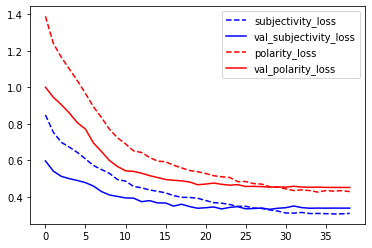

In [ ]:
plt.plot(history.history['subjectivity_loss'], 'b--')
plt.plot(history.history['val_subjectivity_loss'], 'b-')
plt.plot(history.history['polarity_loss'], 'r--')
plt.plot(history.history['val_polarity_loss'], 'r-')
plt.legend(['subjectivity_loss', 'val_subjectivity_loss', 'polarity_loss', 'val_polarity_loss'])
plt.show()

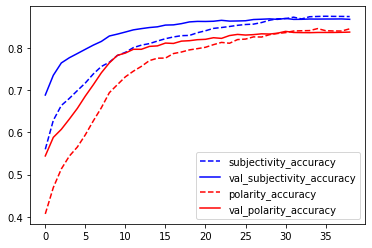

In [ ]:
plt.plot(history.history['subjectivity_accuracy'], 'b--')
plt.plot(history.history['val_subjectivity_accuracy'], 'b-')
plt.plot(history.history['polarity_accuracy'], 'r--')
plt.plot(history.history['val_polarity_accuracy'], 'r-')
plt.legend(['subjectivity_accuracy', 'val_subjectivity_accuracy', 'polarity_accuracy', 'val_polarity_accuracy'])
plt.show()

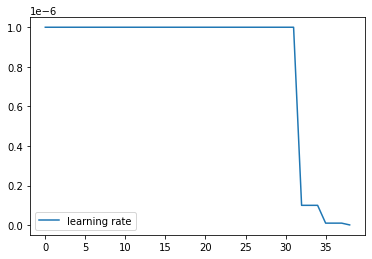

In [ ]:
plt.plot(history.history['lr'])
plt.legend(['learning rate'])
plt.show()

In [ ]:
with strategy.scope():
  model.load_weights('/content/drive/My Drive/CZ4034/bert-preprocessing-multitask-weights.h5')
  y_pred = model.predict(test_dataset, verbose=1)

9/9 [==============================] - 17s 2s/step


In [ ]:
def save_pred(y_pred, name):
  test['subjectivity_pred_prob'] = np.amax(y_pred[0], axis=1)
  test['subjectivity_pred'] = np.argmax(y_pred[0], axis=1)
  test['polarity_pred_prob'] = np.amax(y_pred[1], axis=1)
  test['polarity_pred'] = np.argmax(y_pred[1], axis=1)

  indices = test[(test.subjectivity_pred == 0) & (test.polarity_pred != 0)].index
  test.loc[indices, 'polarity_pred'] = 0

  test.to_csv(name, index=False)

In [ ]:
save_pred(y_pred, '/content/drive/My Drive/CZ4034/predictions/bert-preprocessing-multitask.csv')

# Metrics

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
bert = pd.read_csv('/content/drive/My Drive/CZ4034/predictions/bert-base.csv')
bert_multi = pd.read_csv('/content/drive/My Drive/CZ4034/predictions/bert-multitask.csv')
bert_pre = pd.read_csv('/content/drive/My Drive/CZ4034/predictions/bert-base-preprocessing.csv')
bert_pre_multi = pd.read_csv('/content/drive/My Drive/CZ4034/predictions/bert-preprocessing-multitask.csv')

## Bert

In [ ]:
clf_report = classification_report(bert.polarity, bert.polarity_pred, output_dict=True)
pd.DataFrame.from_dict(clf_report).round(3)

,0,1,2,accuracy,macro avg,weighted avg
precision,0.720,0.545,0.759,0.697,0.675,0.707
recall,0.897,0.644,0.247,0.697,0.596,0.697
f1-score,0.799,0.590,0.373,0.697,0.587,0.662
support,1029.000,216.000,433.000,0.697,1678.000,1678.000


## Bert + Preprocessing

In [ ]:
clf_report = classification_report(bert_pre.polarity, bert_pre.polarity_pred, output_dict=True)
pd.DataFrame.from_dict(clf_report).round(3)

,0,1,2,accuracy,macro avg,weighted avg
precision,0.793,0.534,0.605,0.71,0.644,0.711
recall,0.799,0.616,0.547,0.71,0.654,0.710
f1-score,0.796,0.572,0.575,0.71,0.647,0.710
support,1029.000,216.000,433.000,0.71,1678.000,1678.000


## Bert + multitask 

In [ ]:
clf_report = classification_report(bert_multi.polarity, bert_multi.polarity_pred, output_dict=True)
pd.DataFrame.from_dict(clf_report).round(3)

,0,1,2,accuracy,macro avg,weighted avg
precision,0.766,0.543,0.678,0.721,0.663,0.715
recall,0.851,0.556,0.492,0.721,0.633,0.721
f1-score,0.807,0.549,0.570,0.721,0.642,0.713
support,1029.000,216.000,433.000,0.721,1678.000,1678.000


In [ ]:
clf_report = classification_report(bert_multi.subjectivity, bert_multi.subjectivity_pred, output_dict=True)
pd.DataFrame.from_dict(clf_report).round(3)

,0,1,accuracy,macro avg,weighted avg
precision,0.772,0.700,0.748,0.736,0.744
recall,0.836,0.609,0.748,0.722,0.748
f1-score,0.803,0.651,0.748,0.727,0.744
support,1029.000,649.000,0.748,1678.000,1678.000


## Bert + preprocessing + multitask

In [ ]:
clf_report = classification_report(bert_pre_multi.polarity, bert_pre_multi.polarity_pred, output_dict=True)
pd.DataFrame.from_dict(clf_report).round(3)

,0,1,2,accuracy,macro avg,weighted avg
precision,0.713,0.515,0.769,0.689,0.665,0.702
recall,0.915,0.560,0.215,0.689,0.563,0.689
f1-score,0.801,0.537,0.336,0.689,0.558,0.647
support,1029.000,216.000,433.000,0.689,1678.000,1678.000


In [ ]:
clf_report = classification_report(bert_pre_multi.subjectivity, bert_pre_multi.subjectivity_pred, output_dict=True)
pd.DataFrame.from_dict(clf_report).round(3)

,0,1,accuracy,macro avg,weighted avg
precision,0.732,0.719,0.728,0.725,0.727
recall,0.879,0.488,0.728,0.684,0.728
f1-score,0.799,0.582,0.728,0.690,0.715
support,1029.000,649.000,0.728,1678.000,1678.000


## Ensemble with the best

Roberta(multitask) + Bert(multitask)

In [ ]:
roberta_multi = pd.read_csv('/content/drive/My Drive/CZ4034/predictions/roberta+multitask.csv')
bert_multi = pd.read_csv('/content/drive/My Drive/CZ4034/predictions/bert-multitask.csv')

In [ ]:
roberta_multi

,text,timestamp,code,company,processed_text,subjectivity,polarity,subjectivity_pred_prob,subjectivity_pred,polarity_pred_prob,polarity_pred
0,"PepsiCo Inc (PEP) price at close, 2021-03-02, ...",Tue Mar 02 22:52:40 +0000 2021,PEP,PepsiCo Inc.,pepsico inc pep price close 20210302 13107 fyi...,0,0,0.940071,0,0.909186,0
1,Teleflex v. Continental Can Co.. (1883) Prayer...,Mon Mar 08 23:24:58 +0000 2021,TFX,Teleflex,teleflex v continental co 1883 prayer protecte...,0,0,0.963847,0,0.947015,0
2,Researchers at @Harvard &amp; @MassGeneralNews...,Tue Mar 09 23:01:26 +0000 2021,LLY,Lilly (Eli) & Co.,researchers harvard amp massgeneralnews publis...,0,0,0.979764,0,0.965618,0
3,"United Airlines holdings, Inc. (UAL) announced...",Thu Mar 04 02:31:03 +0000 2021,UAL,United Airlines Holdings,united airlines holdings inc ual announced tod...,1,2,0.899792,1,0.907597,2
4,"At Thermo Fisher Scientific, what you do every...",Wed Mar 10 01:41:37 +0000 2021,TMO,Thermo Fisher Scientific,thermo fisher scientific day meaningful click ...,0,0,0.686541,0,0.619261,0
...,...,...,...,...,...,...,...,...,...,...,...
1673,#advertising #digitalagency #mediaagency Omnic...,Tue Mar 02 13:16:42 +0000 2021,OMC,Omnicom Group,advertising digitalagency mediaagency omnicom ...,0,0,0.952704,1,0.974301,2
1674,$CDNS:\n\nNew Insider Filing on CADENCE DESIGN...,Tue Mar 02 09:05:23 +0000 2021,CDNS,Cadence Design Systems,$ cdns new insider filing cadence design syste...,0,0,0.928000,0,0.877298,0
1675,@Stonekettle Can we seize the nearest Trump co...,Tue Mar 09 23:04:53 +0000 2021,LNC,Lincoln National,stonekettle seize nearest trump country club d...,1,1,0.545355,1,0.532370,1
1676,"One of our industry partners, Valero Energy, g...",Fri Mar 05 17:00:02 +0000 2021,VLO,Valero Energy,industry partners valero energy gives ways lik...,1,2,0.975290,1,0.984023,2


In [ ]:
bert_multi.polarity_pred_prob[0]

0.66009784

In [ ]:
ensemble_pol_pred = []
ensemble_sub_pred = []
data_len = len(bert_multi)

for i in range(data_len):
  
  if bert_multi.polarity_pred_prob[i] > roberta_multi.polarity_pred_prob[i]:
    ensemble_pol_pred.append(bert_multi.polarity_pred[i])
  else:
    ensemble_pol_pred.append(roberta_multi.polarity_pred[i])

  if bert_multi.subjectivity_pred_prob[i] > roberta_multi.subjectivity_pred_prob[i]:
    ensemble_sub_pred.append(bert_multi.subjectivity_pred[i])
  else:
    ensemble_sub_pred.append(roberta_multi.subjectivity_pred[i])


In [ ]:
clf_report = classification_report(bert_multi.polarity, ensemble_pol_pred, output_dict=True)
pd.DataFrame.from_dict(clf_report).round(3)

,0,1,2,accuracy,macro avg,weighted avg
precision,0.782,0.591,0.675,0.734,0.683,0.730
recall,0.835,0.644,0.538,0.734,0.672,0.734
f1-score,0.808,0.616,0.599,0.734,0.674,0.729
support,1029.000,216.000,433.000,0.734,1678.000,1678.000


In [ ]:
clf_report = classification_report(bert_multi.subjectivity, ensemble_sub_pred, output_dict=True)
pd.DataFrame.from_dict(clf_report).round(3)

,0,1,accuracy,macro avg,weighted avg
precision,0.778,0.699,0.751,0.739,0.748
recall,0.831,0.624,0.751,0.727,0.751
f1-score,0.804,0.660,0.751,0.732,0.748
support,1029.000,649.000,0.751,1678.000,1678.000


In [ ]:
new_df = pd.DataFrame()
new_df['text'] = bert_multi.text
new_df['timestamp'] = bert_multi.timestamp
new_df['code'] = bert_multi.code
new_df['company'] = bert_multi.company
new_df['subjectivity']
new_df['polarity']

# Json generation

In [ ]:
BERTWEET = 'vinai/bertweet-base'
ALBERT = 'albert-base-v2'
BERT_BASE = 'bert-base-uncased'
BERT_LARGE = 'bert-large-uncased'
DISTILBERT_BASE = 'distilbert-base-uncased'
XLM_ROBERTA_BASE = 'jplu/tf-xlm-roberta-base'
ROBERTA_TWITTER_BASE = 'cardiffnlp/twitter-roberta-base-sentiment'

bert_type = ROBERTA_TWITTER_BASE

with strategy.scope():
  fast_tokenizer = AutoTokenizer.from_pretrained(bert_type, do_lower_case=True, use_fast=True)
  base_model = TFAutoModel.from_pretrained(bert_type)

Some layers from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing TFRobertaModel: ['classifier']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
def build_model(transformer, max_len=512, dropout_val=0.1, lr=1e-5):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]

    norm = BatchNormalization()(cls_token)
    dropout1 = Dropout(dropout_val)(norm)
    dense = Dense(1024, activation='relu')(dropout1)
    dropout2 = Dropout(dropout_val)(dense)

    subjectivity = Dense(2, activation='softmax', name='subjectivity')(dropout2)
    polarity = Dense(3, activation='softmax', name='polarity')(dropout2)
    
    model = Model(inputs=input_word_ids, outputs=[subjectivity, polarity])

    model.compile(Adam(lr), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy('accuracy')])
    
    return model
    
with strategy.scope():
  # transformer_layer = (base_model)
  model = build_model(base_model, max_len=MAX_LEN, dropout_val=0.3, lr=1e-6)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 256)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model (TFRobertaMode TFBaseModelOutputWit 124645632   input_word_ids[0][0]             
__________________________________________________________________________________________________
tf.__operators__.getitem_1 (Sli (None, 768)          0           tf_roberta_model[0][0]           
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 768)          3072        tf.__operators__.getitem_1[0][0] 
____________________________________________________________________________________________

In [ ]:
train = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/train.csv', lineterminator='\n')
val = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/val.csv', lineterminator='\n')
test = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/test.csv', lineterminator='\n')

In [ ]:
tweets = train.append(val, sort=False)
tweets = tweets.append(test,sort=False)
tweets = tweets.drop(columns=['processed_text', 'subjectivity', 'polarity'])

In [ ]:
tweets

,text,timestamp,code,company
0,Assurant to sell prearranged funeral insurance...,Tue Mar 09 12:19:44 +0000 2021,AIZ,Assurant
1,$KHC:\n\nNew Insider Filing on Kraft Heinz Co'...,Thu Mar 04 05:25:17 +0000 2021,KHC,Kraft Heinz Co
2,Cheese burger pizza from domino’s is better th...,Wed Mar 10 01:07:36 +0000 2021,DPZ,Domino's Pizza
3,Perrigo to sell generic Rx business for $1.55B...,Sat Mar 06 02:23:38 +0000 2021,PRGO,Perrigo
4,When the Price of Northrop Grumman $NOC Talk...,Wed Mar 10 01:30:03 +0000 2021,NOC,Northrop Grumman
...,...,...,...,...
1673,#advertising #digitalagency #mediaagency Omnic...,Tue Mar 02 13:16:42 +0000 2021,OMC,Omnicom Group
1674,$CDNS:\n\nNew Insider Filing on CADENCE DESIGN...,Tue Mar 02 09:05:23 +0000 2021,CDNS,Cadence Design Systems
1675,@Stonekettle Can we seize the nearest Trump co...,Tue Mar 09 23:04:53 +0000 2021,LNC,Lincoln National
1676,"One of our industry partners, Valero Energy, g...",Fri Mar 05 17:00:02 +0000 2021,VLO,Valero Energy


In [ ]:
def fast_encode(sentences, tokenizer, chunk_size=256, maxlen=512):
    input_ids, input_masks = [],[]
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=maxlen, 
                                       padding='max_length', 
                                       truncation=True,
                                       return_attention_mask=False, 
                                       return_token_type_ids=False)
        input_ids.append(inputs['input_ids'])
        # input_masks.append(inputs['attention_mask'])
        # input_segments.append(inputs['token_type_ids'])

    return np.asarray(input_ids, dtype='int32')

In [ ]:
with strategy.scope():
  X_predict = fast_encode(tweets.text.values.tolist(), fast_tokenizer, maxlen=MAX_LEN)


In [ ]:
BATCH_SIZE = 24 * strategy.num_replicas_in_sync
AUTO = tf.data.experimental.AUTOTUNE

predict_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_predict))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

In [ ]:
with strategy.scope():
  model.load_weights('/content/drive/My Drive/CZ4034/bert-multitask-weights.h5')
  y_pred_bert = model.predict(predict_dataset, verbose=1)

88/88 [==============================] - 21s 198ms/step


In [ ]:
y_pred_bert #just checking

[array([[0.9868059 , 0.01319406],
        [0.87731665, 0.12268334],
        [0.12707388, 0.8729261 ],
        ...,
        [0.93913275, 0.06086726],
        [0.08694002, 0.91305995],
        [0.9611887 , 0.03881129]], dtype=float32),
 array([[0.9800442 , 0.00367979, 0.01627598],
        [0.7224119 , 0.11096284, 0.16662529],
        [0.06234393, 0.13830689, 0.7993491 ],
        ...,
        [0.9022115 , 0.05000179, 0.04778677],
        [0.0727549 , 0.03461546, 0.8926296 ],
        [0.9563514 , 0.01086738, 0.03278112]], dtype=float32)]

In [ ]:
with strategy.scope():
  model.load_weights('/content/drive/My Drive/CZ4034/roberta-non-preprocessed-weights.h5')
  y_pred_roberta = model.predict(predict_dataset, verbose=1)

88/88 [==============================] - 22s 212ms/step


In [ ]:
y_pred_roberta #just checking

[array([[0.9690692 , 0.03093076],
        [0.8750294 , 0.12497058],
        [0.05008446, 0.9499155 ],
        ...,
        [0.44989726, 0.5501028 ],
        [0.02547372, 0.9745263 ],
        [0.84897023, 0.15102977]], dtype=float32),
 array([[0.9418484 , 0.03573767, 0.0224139 ],
        [0.93156564, 0.03394945, 0.03448484],
        [0.01767352, 0.02166739, 0.9606591 ],
        ...,
        [0.26752096, 0.5359381 , 0.1965409 ],
        [0.00976568, 0.00716058, 0.9830738 ],
        [0.53755224, 0.4092157 , 0.053232  ]], dtype=float32)]

In [ ]:
tweets['subjectivity'] = np.argmax(y_pred_roberta[0] + y_pred_bert[0], axis = 1) 
tweets.polarity.unique()

array([0, 1])

In [ ]:
tweets['polarity'] = np.argmax(y_pred_roberta[1] + y_pred_bert[1], axis = 1) 
tweets.subjectivity.unique()

array([0, 1])

In [ ]:
indices = tweets[(tweets.subjectivity == 0) & (tweets.polarity != 0)].index
tweets.loc[indices, 'polarity'] = 0

In [ ]:
tweets

,text,timestamp,code,company,polarity,subjectivity
0,Assurant to sell prearranged funeral insurance...,Tue Mar 09 12:19:44 +0000 2021,AIZ,Assurant,0,0
1,$KHC:\n\nNew Insider Filing on Kraft Heinz Co'...,Thu Mar 04 05:25:17 +0000 2021,KHC,Kraft Heinz Co,0,0
2,Cheese burger pizza from domino’s is better th...,Wed Mar 10 01:07:36 +0000 2021,DPZ,Domino's Pizza,2,1
3,Perrigo to sell generic Rx business for $1.55B...,Sat Mar 06 02:23:38 +0000 2021,PRGO,Perrigo,0,0
4,When the Price of Northrop Grumman $NOC Talk...,Wed Mar 10 01:30:03 +0000 2021,NOC,Northrop Grumman,0,0
...,...,...,...,...,...,...
1673,#advertising #digitalagency #mediaagency Omnic...,Tue Mar 02 13:16:42 +0000 2021,OMC,Omnicom Group,2,1
1674,$CDNS:\n\nNew Insider Filing on CADENCE DESIGN...,Tue Mar 02 09:05:23 +0000 2021,CDNS,Cadence Design Systems,0,0
1675,@Stonekettle Can we seize the nearest Trump co...,Tue Mar 09 23:04:53 +0000 2021,LNC,Lincoln National,0,0
1676,"One of our industry partners, Valero Energy, g...",Fri Mar 05 17:00:02 +0000 2021,VLO,Valero Energy,2,1


In [ ]:
tweets.polarity.unique()

array([0, 2, 1])

In [ ]:
tweets.subjectivity.unique()

array([0, 1])

In [ ]:
import json

with open('/content/drive/My Drive/CZ4034/final_predicted_tweets.json', 'w') as outfile:
  result = tweets.to_json(orient="records")
  parsed = json.loads(result)
  json.dump(parsed, outfile, indent=4) 

